# 5w 作业

by @hysic, some notes from @Whalechen

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy import stats

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns


## 1. 学习理解什么是极大似然估计。

* [极大似然估计](https://en.wikipedia.org/wiki/Maximum_likelihood), maximum-likelihood estimation (MLE), 是在给定样本数据和含有未知参数的统计模型(例如正态分布)的情况下, 找到统计模型的参数(例如正态分布的 $\mu$ 和 $\sigma$), 使得这组样本数据出现的可能性最大.

* 什么叫最大可能性? 在数学上定义了一个似然函数(likelihood function), 一般是概率密度函数(PDF)或概率质量函数(PMF)，整理之后求最大值。 

* python 中是用 `scipy.stats.fit` 函数来实现 MLE.


参考 http://sites.stat.psu.edu/~dhunter/asymp/fall2002/lectures/ln12.pdf

### 极大似然估计的目的
- 一个函数，我们用 $ f(x) $ 、$g(x)$ 类似形式表示。如果这个函数有一个参数$\theta$，我们用 $ f_\theta(x)$ 或者 $ f(x|\theta) $ 表示。 
- 现在对于如下函数：
$f(x_1,x_2,x_3,\ldots,x_n\mid\theta) $ 
- 我们用另一种方式去理解：
$ \mathcal{L}(\theta\,;\,x_1,\ldots,\,x_n) $
纯粹的，我们只要将 $ \mathcal{L}(x)$ 当成为$ f(x) $ 、$g(x)$ 的类似形式，为了突出我们视野的变化而必须变更函数名的处理方式。
由于不确定 $ \theta $ 的具体值，我们需要对于  $ \theta $ 进行估计，那么我们可以变为 $ \mathcal{L}(\theta)$
- 极大似然估计的目的就是通过有限观测的实际，来估计实际先验不变的参数（如果我们坚信这是存在的）。

### 极大似然估计的方法：
- 如果将 $ \mathcal{L}(\theta) $ 中所有$ \theta $ 的取值取出，设想 ${ \theta_1 \theta_2 \ldots \theta_n }$ ,就有一个集合，可以记为 Ω。
- 在Ω 中，如果存在一个极大值,记为 $\hat\theta\ $ 那么这就是极大似然估计值。由于 对数函数和函数本身是渐增函数，显然如果记 $log \mathcal{L}(\theta) = \ell(\theta) $, 那么对数函数的极大似然估计和函数本身的极大似然估计值是同一个。
- 相对于直接计算函数的极大似然估计值，计算其对数的极大似然估计值更方便

### 浅析极大似然估计法的一致性：
- 这里主要是为了学习数据公式和认识数学的严谨性，
- 极大似然估计法是基于 Kullback-Leibler information number（这里用$ K(f_{\theta_0},f_{\theta_1})$表示） 最终被证明为非负数：
$$ K(f_{\theta_0},f_{\theta_1}) = E_{\theta_0}log{\frac{f_{\theta_0}(X)}{f_{\theta_1}(X)}} $$
- 同时, 如果存在一组数据 $ X_1,X_2,\ldots,X_n$ 由 $f_{\theta_0}(x)$所产生，那么由这组数据得到的极大似然值(MLE)$\hat\theta_n$最终被证明是最接近$\theta_0$ 的值。
- 这个证明基于如下：
$$\frac{1}{N}\sum_{i=1}^N \;log{\frac{f_{\theta_0}(X_i)}{f_{\theta_1}(X_i)}}\to^P E_{\theta_0}log{\frac{f_{\theta_0}(X_i)}{f_{\theta_1}(X_i)}} = -K(f_{\theta_0},f_{\theta_1})$$ 
- 可以知道，基于之前说明，$ K(f_{\theta_0},f_{\theta_1})$ 被证明为非负数 ，那么 $ -K(f_{\theta_0},f_{\theta_1})$  一定是非正数。因此，$\frac{1}{N}\sum_{i=1}^N \;log{\frac{f_{\theta_0}(X_i)}{f_{\theta_1}(X_i)}}> 0$ 
- 所以 $ P(\hat\theta_n != \theta_0) <= {\sum}\ P(\frac{1}{N}\sum_{i=1}^N \;log{\frac{f_{\theta_0}(X_i)}{f_{\theta_1}(X_i)}}) \to 0 $
- 获得证明

### 说明：
- 并非所有的数组都有MLE，同时一些计算可以获得多个MLE。这些需要进一步研究！

In [6]:
# define a sample array with mean=1, std=2
X = stats.norm(loc=1, scale=2)
test = X.rvs(100)
test

array([ 2.75273537,  1.47659764,  1.05419538,  0.57477338, -3.57447464,
        0.95585823, -3.13342034,  1.0511937 ,  1.9859551 ,  4.78477718,
       -0.99352654,  1.02170194,  2.20177012,  0.76939862,  2.26644735,
       -0.74162922,  1.59009128,  4.51125619,  0.96908909,  0.85856825,
        1.88492324, -2.28817955,  1.71185995, -4.23683918,  3.27585501,
        0.24416267,  3.03450986, -1.05855884, -0.31959605, -0.79583141,
        4.06776596,  0.67993761, -1.54098306,  1.35144937, -1.33603986,
        6.16881346,  5.38175685, -0.16153597, -2.4363109 ,  1.71603899,
       -1.64167453,  3.74292867,  0.57980891,  3.09274845,  1.86757001,
       -0.68424647,  3.59210539,  1.40652009,  2.66344796,  3.53961358,
        0.33613518, -1.78883238,  2.27025694,  2.28646342,  1.23594909,
       -2.94589102,  2.34479232,  1.21933555,  1.81648129,  2.37261492,
        1.64679927, -0.33830136,  0.42790847,  0.64459078,  0.6059905 ,
       -0.92748485, -2.02700315, -1.15460789,  2.10341326, -0.24

In [7]:
# use MLE to estimate the mean and std
stats.norm.fit(test)

(0.72477089391174365, 2.1462987654499335)

In [8]:
# 其实对于正态分布, MLE 估计的结果和样本均值和标准差(ddof=0)一致
# 证明见: http://www.statlect.com/normal_distribution_maximum_likelihood.htm
# 由此也可以看出, MLE 估计并不是无偏估计
test.mean(), test.std()

(0.72477089391174365, 2.1462987654499335)

## 2. 使用Pandas中的函数，下载上证综指过去1年的收盘数据，以此来计算日收益率序列，对这个数据画出直方图，计算这组数据的各个描述性统计量。

* [收益率](https://en.wikipedia.org/wiki/Rate_of_return)(rate of return)有两种, 一种是ordinary return, 定义为
$r = \frac{V_f - V_i}{V_i}$, 另一种是 logarithmic return, 定义为 $r_{log} = \frac{ln\frac{V_f}{V_i}}{t}$. 在收益率较低时, 二者接近相等. 我这里采用第一种定义.


In [9]:
import pandas_datareader.data as web

In [10]:
import datetime
# set the end to today
end = datetime.datetime.today()
# set the start to 1 year ago
interval = datetime.timedelta(days=365)
start = end - interval

In [11]:
sse_dfs1 = web.DataReader("000001.SS", 'yahoo', start, end)

In [12]:
sse_dfs1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231 entries, 2015-03-02 to 2016-02-26
Data columns (total 6 columns):
Open         231 non-null float64
High         231 non-null float64
Low          231 non-null float64
Close        231 non-null float64
Volume       231 non-null int64
Adj Close    231 non-null float64
dtypes: float64(5), int64(1)
memory usage: 12.6 KB


In [13]:
sse_arr = sse_dfs1.Close

In [14]:
type(sse_arr)

pandas.core.series.Series

In [15]:
sse_arr.describe()

count     231.000000
mean     3695.946710
std       596.009001
min      2655.660000
25%      3282.800000
50%      3617.320000
75%      4043.670000
max      5166.350000
Name: Close, dtype: float64

In [16]:
sse_arr.head()

Date
2015-03-02    3336.28
2015-03-03    3263.05
2015-03-04    3279.53
2015-03-05    3248.48
2015-03-06    3241.19
Name: Close, dtype: float64

In [17]:
# shift the sse_arr by one day 
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.shift.html
sse_arr.shift(1).head()  

Date
2015-03-02        NaN
2015-03-03    3336.28
2015-03-04    3263.05
2015-03-05    3279.53
2015-03-06    3248.48
Name: Close, dtype: float64

In [18]:
sse_ror = (sse_arr / sse_arr.shift(1)) - 1

In [19]:
# drop the NA in the first line
# http://pandas.pydata.org/pandas-docs/stable/missing_data.html#dropping-axis-labels-with-missing-data-dropna
sse_ror = sse_ror.dropna()

In [20]:
sse_ror.name = "Daily RoR"
sse_ror.describe()

count    230.000000
mean      -0.000453
std        0.026690
min       -0.084907
25%       -0.012100
50%        0.001853
75%        0.018049
max        0.076940
Name: Daily RoR, dtype: float64

In [21]:
# 收益率中位数
sse_ror.median()

0.0018528090798636265

In [22]:
# 收益率均值
sse_ror.mean()

-0.00045315900436897726

In [23]:
# 收益率样本标准差
sse_ror.var(ddof=1)

0.00071233943907153985

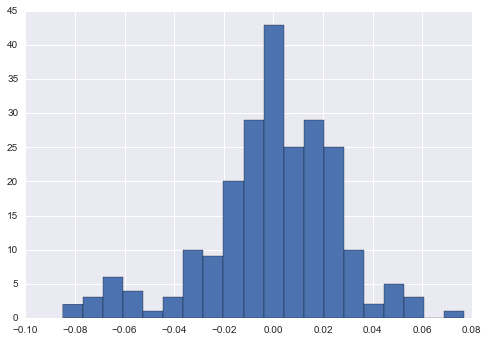

In [24]:
plt.hist(sse_ror, bins=20);

In [25]:
sse_ror.skew()
# 偏度描述概率分布的不对称性. 偏度小于0, 左偏态, 左侧的尾部更长，分布的主体集中在右侧, 这也与上图一致.

-0.69781216338760377

In [26]:
# 年收益率的定义...惨不忍睹...
sse_arr[-1]/sse_arr[0] - 1

-0.1705702159291187

In [27]:
# 根据日收益率计算的年收益率
(1+sse_ror).prod()-1

-0.17057021592911703

## 3. 对上述收益率数据，使用参数方法和非参数方法估计其概率密度函数。参数方法选择正态分布~~和对数正态分布两种~~假设。基于上述三种方法分别计算收益率小于0的概率。

In [28]:
# 收益率实际小于0的概率
sse_ror[sse_ror<0].count() * 1./sse_ror.count()

0.45652173913043476

### 3.1 参数方法之正态分布假设

* 采用最大似然估计(MLE), 先从理论角度看: 

假设 `sse_ror` 服从正态分布

* 若使用 MLE 去估计参数 $\mu,\sigma$, 则 likelihood function 为:
$$ \mathcal{L}(\mu,\sigma)=f_D(x_1,x_2,...x_n|\mu,\sigma)$$
* 正态分布的 pdf 为: $f(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{- \frac{(x-\mu)^2}{2\sigma^2}}$
* likelihood function 可写为: $\mathcal{L}(\mu,\sigma)= \prod_{i=1}^{n} f(x_i|\mu,\sigma)$
* 所以 $$\mathcal{L}(\mu,\sigma)= \frac{1}{2\pi\sigma^2}^{\frac{n}{2}}  exp(-\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2+n(\bar{x}-\mu)^2}{2\sigma^2})$$
* 使得上述function 最大的$\mu,\sigma$就是 MLE
* 可以分别对$\mu,\sigma$求导
* 可得 $\hat{\mu} = \bar{x} = \sum_{i=1}^{n}x_i/n$ 也就是 sample mean
* $ \hat{\sigma}^2 = \sum_{i=1}^{n}(x_i-\hat{\mu})^2/n$ 也就是 sample variance (biased)

In [29]:
# 直接采用 fit 来得出参数
# 最大似然估计的 mean 和 std.
mu_1, sig_1 = stats.norm.fit(sse_ror)
mu_1, sig_1

(-0.00045315900436897726, 0.026631603614419779)

In [30]:
X = stats.norm(mu_1, sig_1)

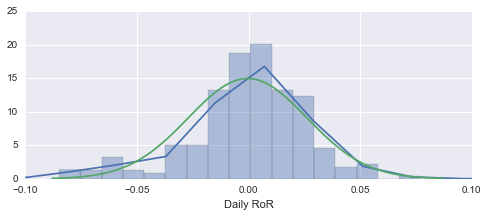

In [31]:
fig, ax = plt.subplots(figsize=(8, 3))

plt.xlim(-0.1, 0.1)

sns.distplot(sse_ror, ax=ax)  # the blue line and histogram

x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu_1, scale=sig_1).pdf(x));  # the green line

In [32]:
# 根据正态分布假设估计收益率小于0的概率
X.cdf(0)

0.50678800892264275

### 3.3 非参数方法

* [非参数统计](https://en.wikipedia.org/wiki/Nonparametric_statistics)(Nonparametric statistics), 我的理解是不事先假定样本的概率模型, 模型中参数个数随着样本数量增加而增加.

* 常用的非参数统计模型有条形图, 核密度估计(KDE), k-临近算法(KNN), 有限向量机(SVN).

* 本节讲到的非参数方法是[核密度估计](https://en.wikipedia.org/wiki/Kernel_density_estimation)(Kernel density estimation, KDE), 有两个重要的概念, 一个是核函数(kernel), 一个是带宽(bandwidth). 根据我肤浅的理解(很有可能是错的), kernel 是指在每个样本点周围以核函数展开, 然后叠加作为样本的概率密度估计, 常见的 kernel 有均匀函数, 三角函数, 高斯函数等等. 带宽 bw 是指每个核函数的 scale, 对于高斯核函数, bw 就是 标准差, bw 越小则每个核函数则越尖锐, 与样本拟合得越好, 但可能出现过拟合(猜测).

* 对于 scipy 模块, 目前只实现了高斯核函数, 即 `scipy.stats.gaussian_kde`.


In [33]:
# kde estimate with a Gaussian kernal
kde1 = stats.gaussian_kde(sse_ror)

In [34]:
# 利用 kde 的结果计算收益率小于0的概率
kde1.integrate_box_1d(-np.inf, 0)

0.46677354041177688

In [35]:
# kde estimate with a low bandwidth
kde2 = stats.gaussian_kde(sse_ror, bw_method=0.2)

In [36]:
kde2.integrate_box_1d(-np.inf, 0)

0.46507106504909645

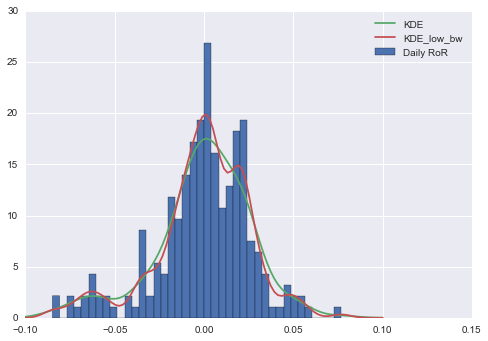

In [37]:
fig, ax = plt.subplots()
ax.hist(sse_ror, normed=True, bins=40)

x = np.linspace(-0.1, 0.1, 100)
ax.plot(x, kde1(x), label = "KDE")
ax.plot(x, kde2(x), label = "KDE_low_bw")
ax.legend();

收益率实际小于0的概率是0.457, 根据正态分布假设, 收益率小于0的概率是0.507, 根据非参数检验, 收益率小于0的概率是0.467, 带宽变小(取 bw=0.2), 收益率小于0的概率为0.465.

总体上看, 非参数检验的估计结果要优于正态分布估计, 带宽越小, 估计的结果越好. 但没有进行交叉检验, 可能发生过拟合(?)

## 4. 使用Pandas中的函数，下载你感兴趣的任意两支股票的数据，计算日收益率序列，使用假设检验来判断这两支股票的平均收益率是否有差别。

* 股票选取大盘股中国石油(601857.SS)和妖股梅雁吉祥(600868.SS).

首先获取两只股票的日收益率序列.

In [38]:
def get_ror(stock_code, start, end):
    df = web.DataReader(stock_code, 'yahoo', start, end)
    arr = df["Close"]
    arr.name = stock_code + "RoR"
    ror = (arr / arr.shift(1)) - 1
    return ror.dropna()

In [39]:
# set the end to today
end = datetime.datetime.today()
# set the start to 1 year ago
interval = datetime.timedelta(days=365)
start = end - interval

In [40]:
# 中国石油的日收益率序列
zgsy_ror = get_ror("601857.SS", start, end)

In [42]:
# 梅雁吉祥的日收益率序列
myjx_ror = get_ror("600868.SS", start, end)

### 4.1 假设检验方法

* 选取哪种检验方法, 是一个头疼的问题, 群里大家也有许多讨论. 我简单参考这份文档: [Choosing the right hypothesis test](http://www.danshuster.com/apstat/Hypothesis%20Test%20and%20Confidence%20Interval%20Formulas.pdf), 选择2-sample t test, 对应的是 `scipy.stats.ttest_ind` 函数.

In [43]:
static, pv = stats.ttest_ind(zgsy_ror, myjx_ror)
pv

0.30053774785003334

p 值为0.3, 说明两只股票的差异不显著, 即两支股票的日收益率均值没有显著差别.

### 4.2 shuffle 方法

* 看了这个特别赞的 slides: [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers), 里面说只要会 for 循环就可以做统计. 其中第二种方法讲的是 shuffling, 即假设二者均值的偏差是统计随机误差(零假设), 将两个样本放在一起打乱重新分配, 重复多次, 看出现给定偏差的概率(即 p 值).

In [44]:
# 将两支股票的收益率合并成一个 series
mixed_ror = zgsy_ror.append(myjx_ror)

In [45]:
len(mixed_ror), len(zgsy_ror)

(516, 258)

In [46]:
# 计算两支股票平均收益率之差
mean_diff = zgsy_ror.mean() - myjx_ror.mean()
mean_diff

-0.0039973122974913868

中国石油的平均收益率比梅雁吉祥要低约0.4%, 这是随机误差造成的, 还是收益率的真实差距?


In [47]:
shuffled_ror = mixed_ror.copy()

In [48]:
# 模拟次数(这里应该选10000或更高, 结果更精确, 可是那样的话计算时间过长, 只能暂取1000)
N = 1000

In [49]:
result = 0
for i in range(N):
    # 将收益率打乱重排
    np.random.shuffle(shuffled_ror)
    # 将打乱的 series 分成两部分, 计算前后两部分的平均值之差
    shuffled_mean_diff = shuffled_ror[:258].mean() - shuffled_ror[258:].mean()
#    print i, shuffled_mean_diff,
    # 计算收益率小于实际收益率的次数
    if shuffled_mean_diff < mean_diff:
        result += 1
#    print result

p_value = result * 1. / N  # 一定要加上 "*1."

In [50]:
p_value

0.152

p 值与之前 t-test 结果不同(?) 但结果相同, 均表明, 二者日收益率的平均值差距不显著.